<a href="https://colab.research.google.com/github/mihirkudale/GRIP21-Data-Science-and-Business-Analytics/blob/main/Begineer%20Level%20Task/Prediction%20using%20Supervised%20ML/Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science & Business Analytics Intern @ The Sparks Foundation(GRIP21)**
# **Name : Mihir Kudale**
# **Task Level- Begineer**
# **Task 1**
## **Prediction using Supervised ML:**
Predict the percentage of an student based on the no. of study hours.



### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### **Reading Dataset**

In [ ]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Plotting the distribution of scores**

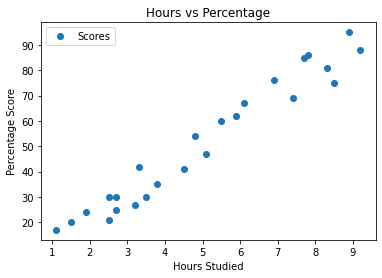

In [ ]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### **Plotting the regression line**

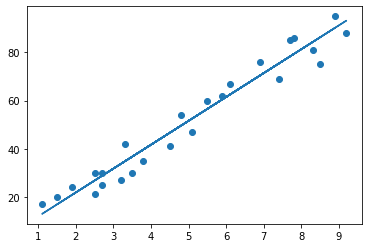

In [ ]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print('Predicted Scores:', y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predicted Scores: [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### **Comparing Actual vs Predicted**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Graph for Comparison**


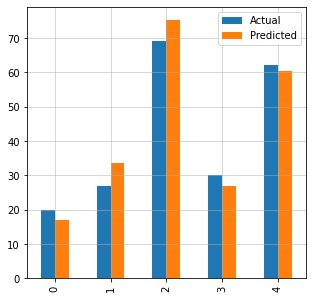

In [ ]:
df.plot(kind='bar', figsize= (5,5))
plt.grid(which= 'major', linewidth= '0.5')
plt.grid(which= 'minor', linewidth= '0.5')
plt.show()

### What will be predicted score is a student studies 9.25 hours/day?

In [ ]:
hours = 9.25
test_new = np.array([hours])
test_new= test_new.reshape(-1,1)
own_pred = regressor.predict(test_new)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

I have used here the mean square error and mean absolute error metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
